# Define the Environment

In [ ]:
import numpy as np

class ENVIREMENT:
  def __init__(self,sigma=2,actions=10):
    self.miu=np.arange(1,1+actions)
    self.sigma=sigma

  def step(self,action):
    return np.random.randn()*self.sigma+self.miu[action]

## Plot the action rewards

average reward of action 0 : 0.9683325148439262
average reward of action 1 : 2.0117968346173125
average reward of action 2 : 2.9966073258571098
average reward of action 3 : 3.970984466347567
average reward of action 4 : 4.893132099280022
average reward of action 5 : 6.13728401833719
average reward of action 6 : 6.999343116182917
average reward of action 7 : 7.962236022076378
average reward of action 8 : 8.94450839014028
average reward of action 9 : 9.962843434340199


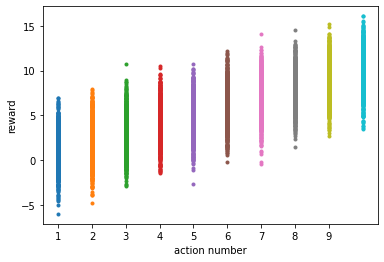

In [ ]:
actions = 10
env = ENVIREMENT(actions=actions,sigma=2)

trials=1000

import matplotlib.pyplot as plt

plt.figure()
plt.xticks(range(actions))
for i in range(actions):
  res=[]
  for j in range(trials):
    res.append(env.step(i))
  
  print('average reward of action {} : {}'.format(i,sum(res)/len(res)))
  plt.plot([i+1 for j in range(trials)],res,'.')

plt.xlabel('action number')
plt.ylabel('reward')
plt.show()

# Simple Bandit Algorithm

In [ ]:
def Epsilon_Greedy(epsilon,Q):
  best_action = np.argmax(Q)
  random_action = np.random.choice(range(len(Q)))

  random = np.random.rand()

  if random<epsilon:
    return random_action
  else:
    return best_action


In [ ]:
def Simple_Bandit(epsilon,steps,actions):
  Q=[0 for i in range(actions)]
  N=[0 for i in range(actions)]

  Rewards = []
  Regret = [0]

  for s in range(steps):
    selected_action = Epsilon_Greedy(epsilon,Q)
    reward = env.step(selected_action)

    Rewards.append(reward)
    
    regret = Regret[-1] + (actions - reward)
    Regret.append(regret)

    N[selected_action] = N[selected_action]+1
    Q[selected_action] = Q[selected_action]+(reward-Q[selected_action])/N[selected_action]
  
  return Regret,Rewards,N,Q

Q values :  [1.1921147688006464, 1.9714518604990905, 2.896305899015336, 4.022565955548924, 5.383351782364427, 5.743585165889844, 7.146901455494562, 7.8610549982429, 8.87665593539933, 9.999599613776711]
N values :  [101, 96, 134, 112, 97, 123, 88, 107, 89, 9053]


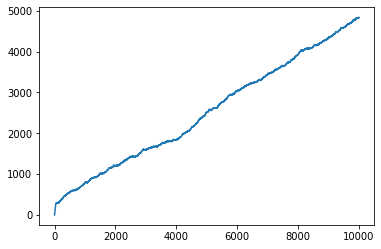

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)
epsilon = 0.1

Regret,Rewards,N,Q = Simple_Bandit(epsilon,steps,actions)
plt.plot(Regret)
print('Q values : ',Q)
print('N values : ',N)


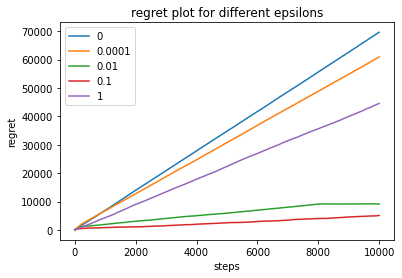

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)

plt.figure(10)
for epsilon in [0,1e-4,1e-2,1e-1,1]:
  Regret,Rewards,N,Q = Simple_Bandit(epsilon,steps,actions)
  plt.plot(Regret,label='{}'.format(epsilon))

plt.xlabel('steps')
plt.ylabel('regret')
plt.title(('regret plot for different epsilons'))
plt.legend()


# Softmax Algorithm

In [ ]:
def Softmax(Q,temperature=1):
  exp = np.exp(Q/temperature)
  prob = exp/np.sum(exp)

  return np.random.choice(range(len(Q)),p=prob)

In [ ]:
def Softmax_Bandit(temperature,steps,actions):
  Q=np.array([0 for i in range(actions)])*1.0
  N=np.array([0 for i in range(actions)])

  Rewards = []
  Regret = [0]

  for s in range(steps):
    selected_action = Softmax(Q,temperature)
    reward = env.step(selected_action)

    Rewards.append(reward)
    
    regret = Regret[-1] + (actions - reward)
    Regret.append(regret)

    N[selected_action] = N[selected_action]+1
    Q[selected_action] = Q[selected_action]+(reward-Q[selected_action])/N[selected_action]
  
  return Regret,Rewards,N,Q

Q values :  [2.05784119 0.         0.         1.30977708 0.         0.
 6.84069624 8.09532721 9.09273434 9.98182309]
N values :  [   2    0    0    1    0    0  430 1450  653 7464]


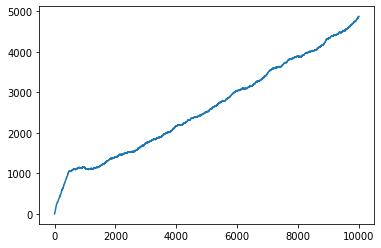

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)
temperature = 1

Regret,Rewards,N,Q = Softmax_Bandit(temperature,steps,actions)
plt.plot(Regret)
print('Q values : ',Q)
print('N values : ',N)


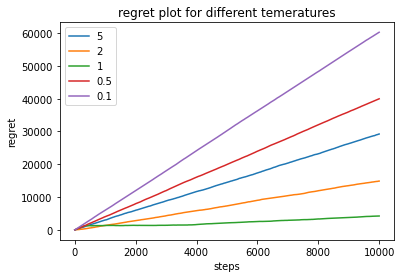

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)

plt.figure(10)
for temperature in [5,2,1,0.5,0.1]:
  Regret,Rewards,N,Q = Softmax_Bandit(temperature,steps,actions)
  plt.plot(Regret,label='{}'.format(temperature))

plt.xlabel('steps')
plt.ylabel('regret')
plt.title(('regret plot for different temeratures'))
plt.legend()


# UCB1 algorithm

In [ ]:
def UCB1(c,steps,actions):
  Q=np.array([0 for i in range(actions)])*1.0
  N=np.array([0 for i in range(actions)])+0.001

  Rewards = []
  Regret = [0]

  for s in range(steps):
    logN = max(np.log(np.sum(N)),0)
    score = Q+c*np.sqrt(logN/N)    
    selected_action = np.argmax(score)

    reward = env.step(selected_action)

    Rewards.append(reward)
    
    regret = Regret[-1] + (actions - reward)
    Regret.append(regret)

    N[selected_action] = N[selected_action]+1
    Q[selected_action] = Q[selected_action]+(reward-Q[selected_action])/N[selected_action]
  
  N = N.astype(np.int)

  return Regret,Rewards,N,Q

Q values :  [1.41685853 3.87377302 2.52329    3.34667785 3.61314803 3.88555244
 7.23850976 8.06607861 8.51537052 9.98358993]
N values :  [   1    1    1    1    1    1    5   11   19 9959]


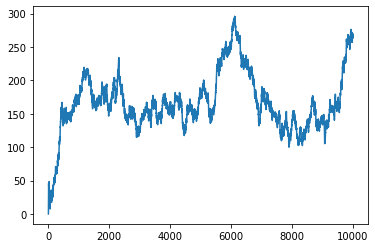

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)
c = 2

Regret,Rewards,N,Q = UCB1(c,steps,actions)
plt.plot(Regret)
print('Q values : ',Q)
print('N values : ',N)

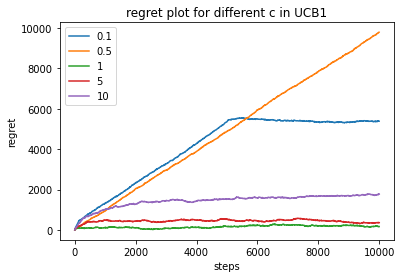

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)

plt.figure(10)
for c in [0.1,0.5,1,5,10]:
  Regret,Rewards,N,Q = UCB1(c,steps,actions)
  plt.plot(Regret,label='{}'.format(c))

plt.xlabel('steps')
plt.ylabel('regret')
plt.title(('regret plot for different c in UCB1'))
plt.legend()


# Exploration Exploitation balance

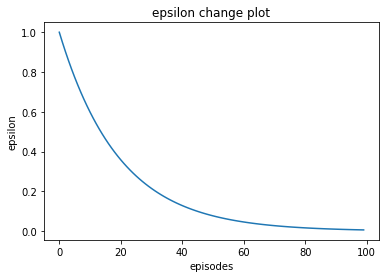

In [ ]:
x = np.arange(100)
y = 0.95**x

plt.plot(x,y)
plt.title('epsilon change plot')
plt.xlabel('episodes')
plt.ylabel('epsilon')
# plt.yscale('log')
plt.show()

In [ ]:
def Epsilon_Decay(eps_start,eps_decay,eps_step,steps,actions):
  Q=np.array([0 for i in range(actions)])*1.0
  N=np.array([0 for i in range(actions)])

  Rewards = []
  Regret = [0]

  epsilon = eps_start

  for s in range(steps):
    selected_action = Epsilon_Greedy(epsilon,Q)
    reward = env.step(selected_action)

    Rewards.append(reward)
    
    regret = Regret[-1] + (actions - reward)
    Regret.append(regret)

    N[selected_action] = N[selected_action]+1
    Q[selected_action] = Q[selected_action]+(reward-Q[selected_action])/N[selected_action]

    if s%eps_step==(eps_step-1):
      epsilon*=eps_decay

  return Regret,Rewards,N,Q


Q values :  [ 1.48532126  1.53002792  2.88878677  3.79794218  5.19477596  6.48543289
  6.96871318  8.85370692  9.25257203 10.02220099]
N values :  [  36   37   41   34   36   45   44   41   38 9648]


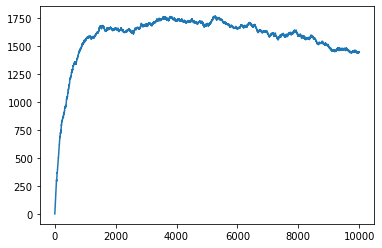

In [ ]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)

Regret,Rewards,N,Q = Epsilon_Decay(eps_start=1,eps_decay=0.95,eps_step=20,steps=steps,actions=actions)
plt.plot(Regret)
print('Q values : ',Q)
print('N values : ',N)
